<a href="https://colab.research.google.com/github/GaneshKannanOfficial/BitcoinPrice_Prediction/blob/main/BitCoin_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-09-23,26578.556641,26634.185547,26520.519531,26579.390625,26579.390625,7404700301
2023-09-24,26579.373047,26716.058594,26221.050781,26256.826172,26256.826172,8192867686
2023-09-25,26253.775391,26421.507812,26011.468750,26298.480469,26298.480469,11997833257


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

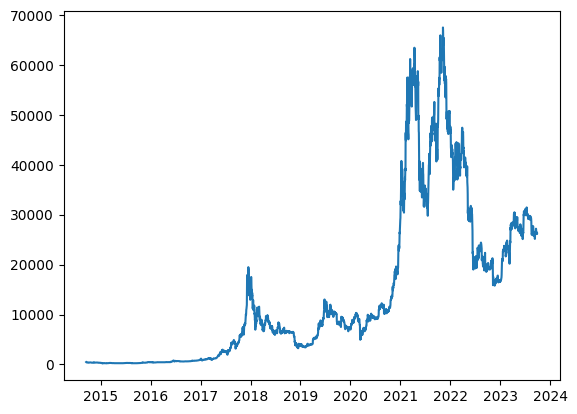

In [5]:
plt.plot(df.index,df['Adj Close'])

In [6]:
model = RandomForestRegressor()

In [7]:
x = df[['Open','High','Low','Volume']]
y = df['Adj Close']

In [8]:
y=np.array(y)
y

array([  457.33401489,   424.44000244,   394.79598999, ...,
       26298.48046875, 26217.25      , 26213.56640625])

In [9]:
row = int(len(x)*0.9)
x_train = x[:row]
x_test = x[row:]
y_train = y[:row]
y_test = y[row:]

In [10]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [11]:
y_pred = model.predict(x_test)

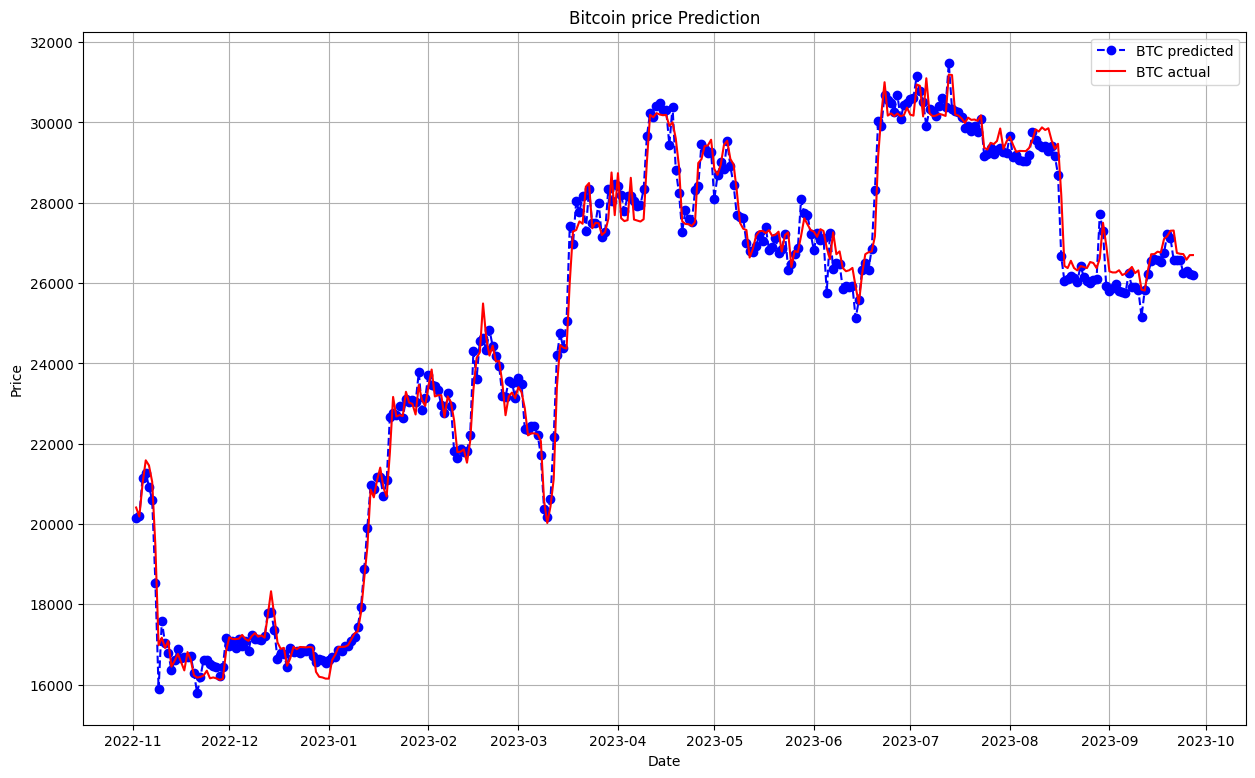

In [12]:
plt.figure(figsize = (15,9))
plt.grid(True)
plt.plot(df.index[row:],y_test,color='b',marker='o',linestyle='dashed',label = 'BTC predicted')
plt.plot(df.index[row:],y_pred,color='r',label = 'BTC actual')
plt.title('Bitcoin price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ,mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

mae = mean_absolute_error(y_test,y_pred)

r_squared = r2_score(y_test,y_pred)

acc = mean_absolute_percentage_error(y_test,y_pred)
acc = (1-acc)*100
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared (R2)' , 'Accuracy'],
    'Value': [rmse, mae, r_squared, acc]
})

print(metrics_df)

           Metric       Value
0            RMSE  405.115863
1             MAE  306.894147
2  R-squared (R2)    0.992434
3        Accuracy   98.751931
